In [29]:
import pandas as pd

In [30]:
df = pd.read_csv("../datasets/Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [31]:
# crim = per capita crime rate by town
# zn - proportion of residential land zoned for lots over 25000 sq ft
# indus - proportion of non retail business acres per town
# chas- charles river dummy variable 1. if trackt bounds rover
# NOX - nitric oxide concentration parts per 10 million
# RM - average number of rooms per dwelling
# AGE - proportion of owner occupied units built prior to 1940
# DIS - weighted distances to five boston employment centers
# RAD -index of accessibility to radial highways
# TAX- full value property tax rate per 10000$
# PTRatio : people teacher ratio bytown
# black : proportion of blacks by town
# lstat: %lower status of the population


df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

# EDA:  correlation

In [58]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [57]:
corr_matrix=df.corr()
corr_matrix["medv"].sort_values(ascending=False)

medv          1.000000
rm            0.695360
zn            0.360445
black         0.333461
dis           0.249929
chas          0.175260
Unnamed: 0   -0.226604
age          -0.376955
rad          -0.381626
crim         -0.388305
nox          -0.427321
tax          -0.468536
indus        -0.483725
ptratio      -0.507787
lstat        -0.737663
Name: medv, dtype: float64

# split to train test

select 80% of observations in random and build a regression model
Predict the price of boston housing dataset

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat']]
Y = df[["medv"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


array([37.6, 27.9, 22.6, 13.8, 35.2, 10.4, 23.9, 29. , 22.8, 23.2, 33.2,
       19. , 20.3, 36.1, 24.4, 17.2, 17.9, 19.6, 19.7, 15. ,  8.1, 23. ,
       44.8, 23.1, 32.2, 10.8, 23.1, 21.2, 22.2, 24.1, 17.3,  7. , 12.7,
       17.8, 26.4, 19.6, 25.1,  8.3, 48.8, 34.9, 13.8, 14.4, 30.1, 12.7,
       27.1, 24.8,  7. , 20.5, 21.5, 14. , 20.4, 22.2, 21.4, 13.5, 19.4,
       24.7, 43.8, 14.1, 28.6, 19.7, 16.8, 23.2, 16.2, 41.3, 22.7,  8.3,
       18.4, 24.7, 21.7, 20.6, 16.7, 22.1, 19.4, 27.5, 27.9, 30.1, 17.4,
       15.4, 31. , 14.2, 19.6, 50. , 21.7, 11.7, 19.4, 13. , 17.5,  9.7,
       20.3, 18.6, 50. , 19.6, 21.4, 18.4, 22.6, 25. , 15.6, 26.6, 22.4,
       13.1, 23. , 24.5])

# Fit the model

In [9]:

import statsmodels.api as sm
# adding the constant term
X_train = sm.add_constant(X_train)
 
# performing the regression
# and fitting the model
olsmodel = sm.OLS(y_train, X_train).fit()

In [10]:
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     84.65
Date:                Sat, 18 Mar 2023   Prob (F-statistic):          8.21e-105
Time:                        00:35:25   Log-Likelihood:                -1202.0
No. Observations:                 404   AIC:                             2432.
Df Residuals:                     390   BIC:                             2488.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9125      5.775      6.565      0.000      26.559      49.266
crim          -0.1308      0.036     -3.603      0.000      -0.202      -0.059
zn             0.0494      0.016      3.131      0.002       0.018       0.080
indus          0.0011      0.072      0.015      0.988      -0.141       0.143
chas           2.7054      0.989      2.737      0.006       0.762       4.649
nox          -15.9571      4.517     -3.532      0.000     -24.838      -7.076
rm             3.4140      0.470      7.266      0.000       2.490       4.338
age            0.0011      0.015      0.077      0.939      -0.027       0.030
dis           -1.4931      0.233     -6.404      0.000      -1.951      -1.035
rad            0.3644      0.079      4.628      0.000       0.210       0.519
tax           -0.0132      0.004     -2.950      0.003      -0.022      -0.004
ptratio       -0.9524      0.149     -6.411      0.000      -1.244      -0.660
black          0.0117      0.003      3.795      0.000       0.006       0.018
lstat         -0.5941      0.058    -10.271      0.000      -0.708      -0.480
==============================================================================
Omnibus:                      134.272   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              542.194
Skew:                           1.423   Prob(JB):                    1.84e-118
Kurtosis:                       7.911   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
X_test = sm.add_constant(X_test) # add again the constant
y_test_predict = olsmodel.predict(X_test) # use the predict method of the object

In [ ]:
https://thomasleeper.com/Rcourse/Tutorials/olscoefplot.html

In [ ]:
https://medium.com/analytics-vidhya/create-your-own-coefficient-plot-function-in-python-aadb9fe27a77

# model results

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
mae = mean_absolute_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('Mean absolute err is {}'.format(mae))
print('R2 score is {}'.format(r2))
print("\n")



The model performance for training set
--------------------------------------
RMSE is 4.741000992236516
Mean absolute err is 3.350009519648455
R2 score is 0.738339392059052




In [24]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
mae = mean_absolute_error(y_test, y_test_predict)
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('Mean absolute err is {}'.format(mae))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 4.56829204230319
Mean absolute err is 3.213270495842373
R2 score is 0.7334492147453096


# inspect the residuals

In [19]:
#https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html

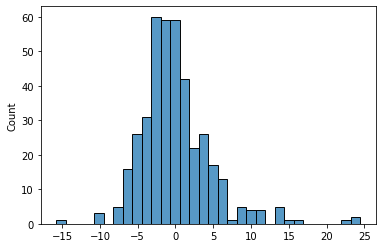

In [35]:
import seaborn as sns
sns.histplot(olsmodel.resid);

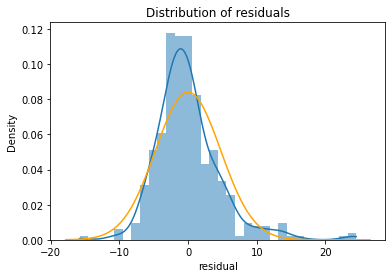

In [53]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
mu, std = stats.norm.fit(olsmodel.resid)


fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=olsmodel.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

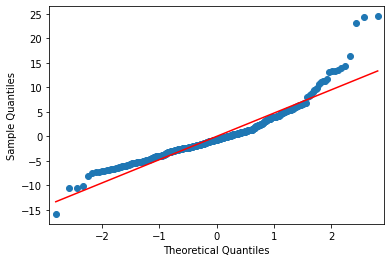

In [56]:
sm.qqplot(olsmodel.resid, line='s');

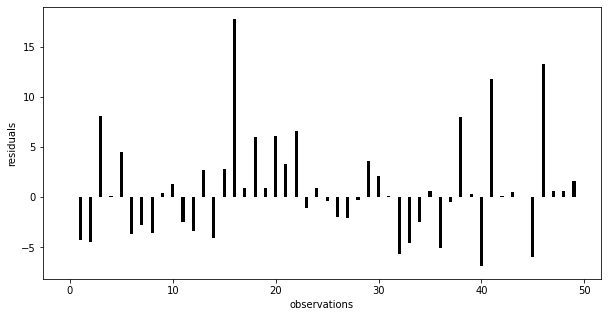

In [48]:
import matplotlib.pyplot as plt
performance = pd.DataFrame({'PREDICTIONS': y_test_predict.values, 'ACTUAL VALUES':y_test["medv"].values})
performance.head()
performance['error']=performance['ACTUAL VALUES']-performance['PREDICTIONS']
performance.head()

#preparing data for plotting
performance.reset_index(drop=True, inplace=True) #inplace turns into a column
performance.reset_index(inplace=True)
performance.head()

#plot the residuals
fig = plt.figure(figsize=(10,5))
plt.bar('index', 'error', data=performance[:50], color='black', width=0.3)
plt.ylabel('residuals')
plt.xlabel('observations')
plt.show()